## Building Model for Lat/Long Tensor with GAM

### Imports

In [8]:
import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold 
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
import xgboost

In [9]:
!pip install folium
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap 

In [10]:
# importing linear GAM
!pip install pygam
from pygam import LinearGAM

In [11]:
from pygam.terms import s as spline
from pygam.terms import f as factor
from pygam.terms import te as tensor

### Looking at dataframe

In [12]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
df_coord=['lat','long']

X=df[df_coord]

X.describe()

,lat,long
count,21597.000000,21597.000000
mean,47.560093,-122.213982
std,0.138552,0.140724
min,47.155900,-122.519000
25%,47.471100,-122.328000
50%,47.571800,-122.231000
75%,47.678000,-122.125000
max,47.777600,-121.315000


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 2 columns):
lat     21597 non-null float64
long    21597 non-null float64
dtypes: float64(2)
memory usage: 337.6 KB


In [15]:
# setting y as only prices
y=df.price
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

### Histogram of zipcodes

Seeing if there is a relationship between zipcode and number of houses

(array([2856., 4380., 3341., 1696.,  351., 4257., 1809., 1134., 1040.,
         733.]),
 array([98001. , 98020.8, 98040.6, 98060.4, 98080.2, 98100. , 98119.8,
        98139.6, 98159.4, 98179.2, 98199. ]),
 <a list of 10 Patch objects>)

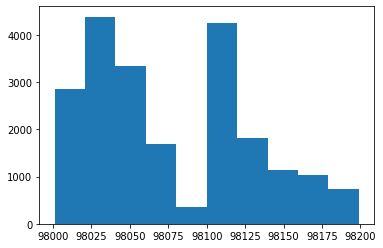

In [16]:
plt.hist(df['zipcode'])

## Running OLS model on just latitude and longitude

In [17]:
import statsmodels.api as sm

model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          2.694e+04
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                        0.00
Time:                        14:31:06   Log-Likelihood:                     -3.0631e+05
No. Observations:               21597   AIC:                                  6.126e+05
Df Residuals:                   21595   BIC:                                  6.126e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Running OLS on latitude and longitude with price gave r-squared value of 0.714

## Linear GAM model

In [18]:
gam = LinearGAM(n_splines=25)
gam.gridsearch(X.values,y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     40.5943
Link Function:                     IdentityLink Log Likelihood:                               -565842.5059
Number of Samples:                        21597 AIC:                                          1131768.2004
                                                AICc:                                         1131768.3648
                                                GCV:                                      95701680398.1224
                                                Scale:                                    95377944158.7722
                                                Pseudo R-Squared:                                   0.2946
Feature Function                  Lam

C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  This is separate from the ipykernel package so we can avoid doing imports until


#### Linear GAM gave a pseudo r-squared of 0.2946

## Plots

C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


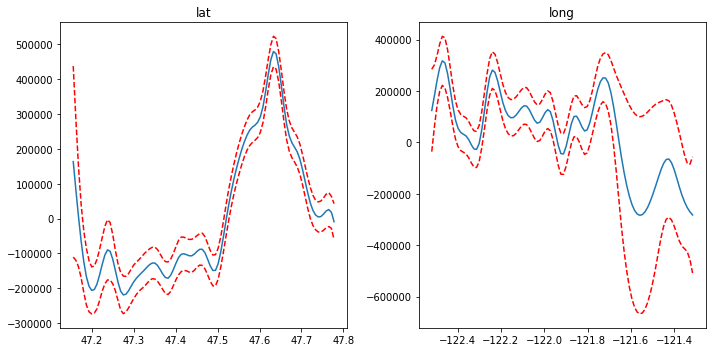

In [19]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

titles = 'lat','long'

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
fig.tight_layout()
fig.show()

In [20]:
# function for y predictions
def model_predict(pipe):
    y_preds = [pipe[i].predict(X) for i in range(len(pipe))]
    y_pred = np.mean(y_preds, axis=0)
    return y_pred

In [21]:
def plot_residuals():
    SIZE = (20,8)

    plt.figure(figsize=SIZE)
    sns.scatterplot(y_pred, (y - y_pred))
    sns.lineplot(y_pred, [0]*len(y_pred), color='red')
    sns.lineplot(y_pred, [1]*len(y_pred), color='green')
    sns.lineplot(y_pred, [-1]*len(y_pred), color='green')
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.show()

    plt.figure(figsize=SIZE)
    plt.hist(y - y_pred, bins=20)
    plt.show()

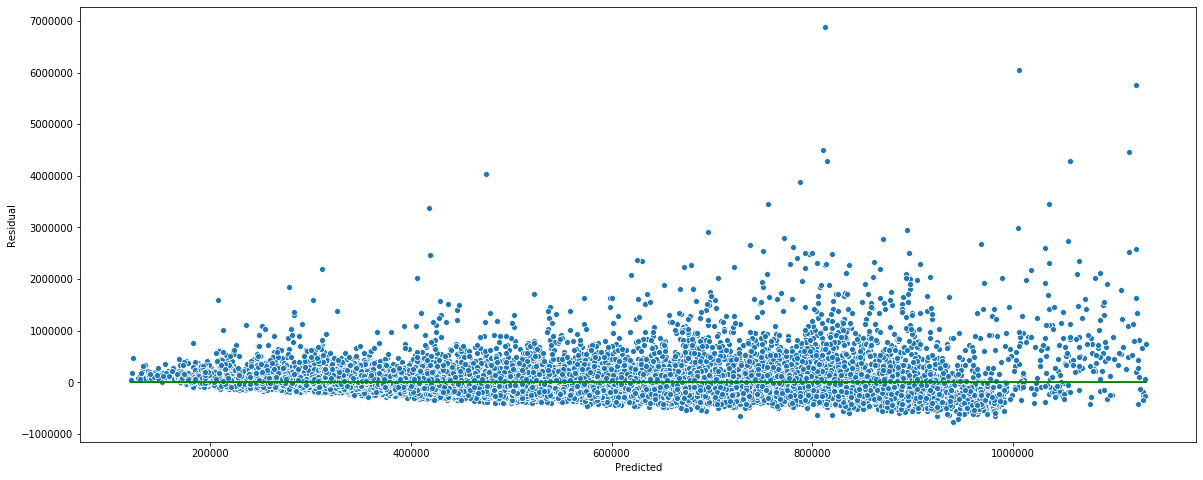

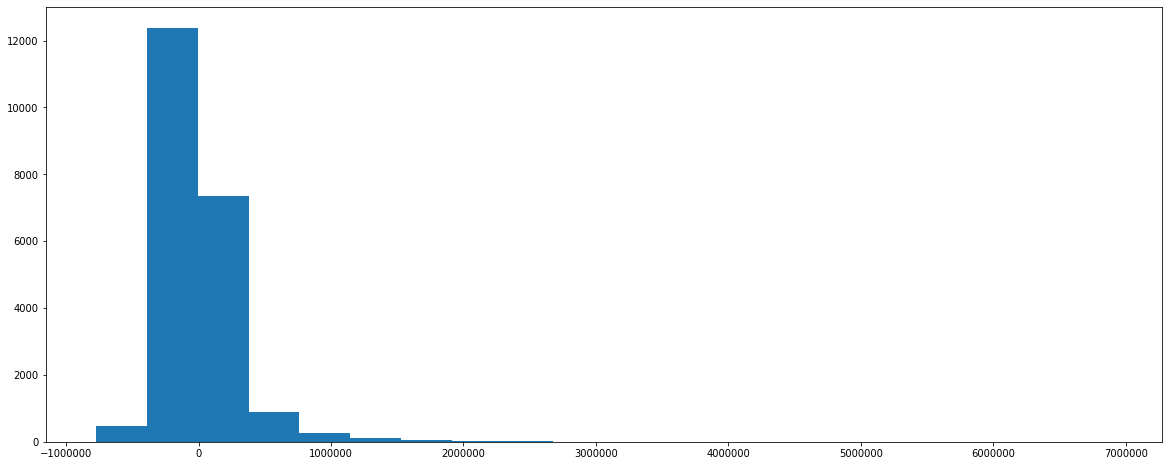

In [34]:
y_pred = model_predict([gam])
plot_residuals()

## GAM model

This model gave pseudo r-squared value of 0.493

In [35]:
from pygam import GAM


gam = GAM(distribution='gamma', link='log')
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:21 Time:  0:00:21


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                     37.0887
Link Function:                          LogLink Log Likelihood:                               -294343.7418
Number of Samples:                        21597 AIC:                                            588763.661
                                                AICc:                                          588763.7992
                                                GCV:                                                0.1709
                                                Scale:                                              0.2415
                                                Pseudo R-Squared:                                   0.4393
Feature Function                  Lam

C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


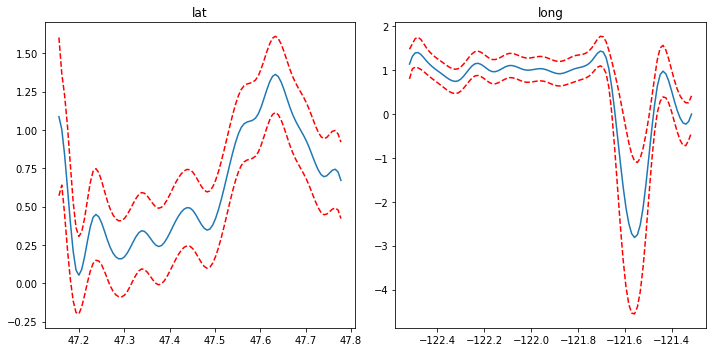

In [36]:
#plots
fig, axs = plt.subplots(1,2,figsize=(10,5))

titles = 'lat','long'

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
fig.tight_layout()
fig.show()

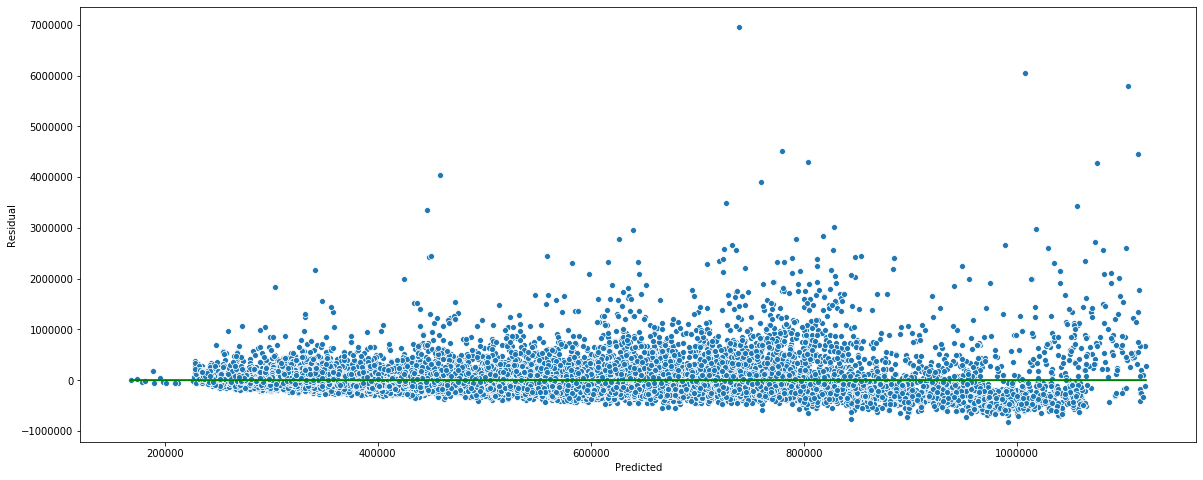

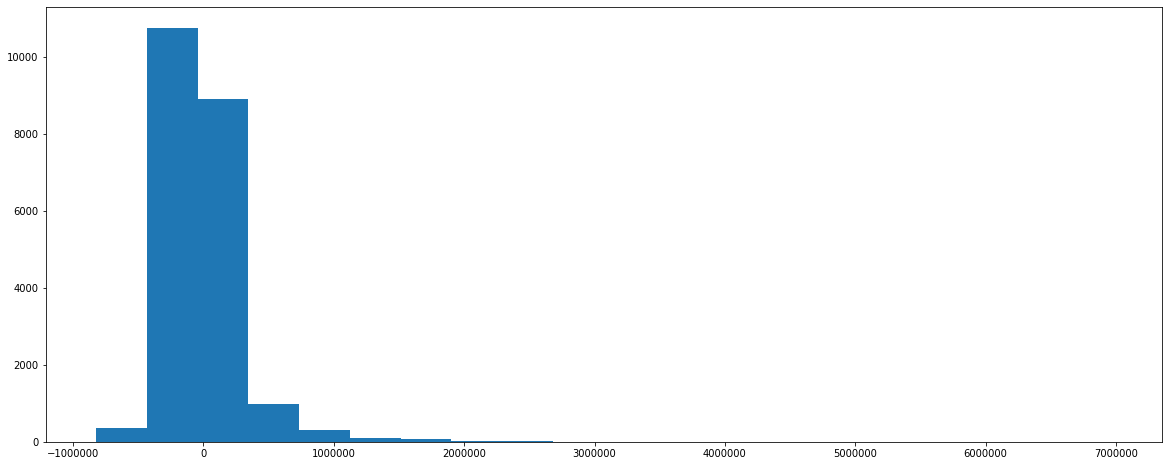

In [37]:
y_pred = model_predict([gam])
plot_residuals()

## Linear GAM with Lat/Long as a Tensor

In [39]:
# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(X):
    term_list.append(spline(i))

# add the lat and long interaction term
term_list.append(tensor(0, 1))

# create the terms and model
terms = np.sum(term_list)
print(terms)
gam = LinearGAM(terms=terms).gridsearch(X.values, y.values)
gam.summary()

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

s(0) + s(1) + te(0, 1)


100% (11 of 11) |########################| Elapsed Time: 0:00:29 Time:  0:00:29


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     75.1277
Link Function:                     IdentityLink Log Likelihood:                               -563052.1327
Number of Samples:                        21597 AIC:                                          1126256.5208
                                                AICc:                                         1126257.0665
                                                GCV:                                      84345774590.4108
                                                Scale:                                    83817806178.3733
                                                Pseudo R-Squared:                                   0.3811
Feature Function                  Lam

C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



Pseudo R-Squared turned out to be 0.3811

C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


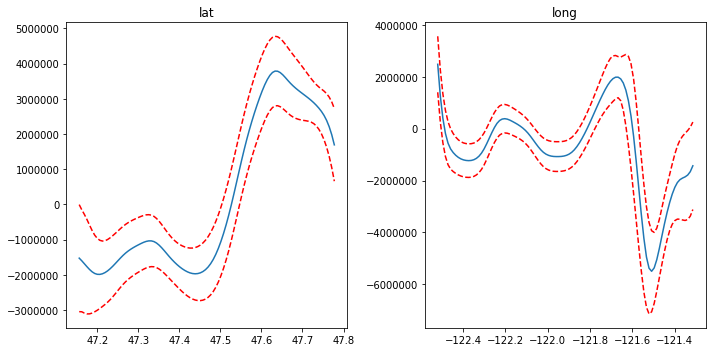

In [40]:
#plots
fig, axs = plt.subplots(1,2,figsize=(10,5))

titles = 'lat','long'

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
fig.tight_layout()
fig.show()

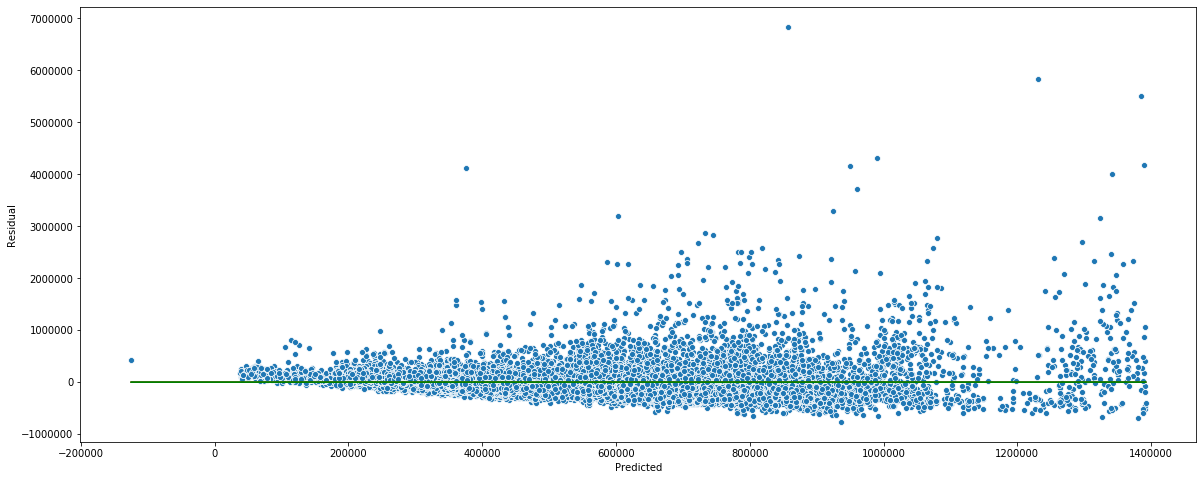

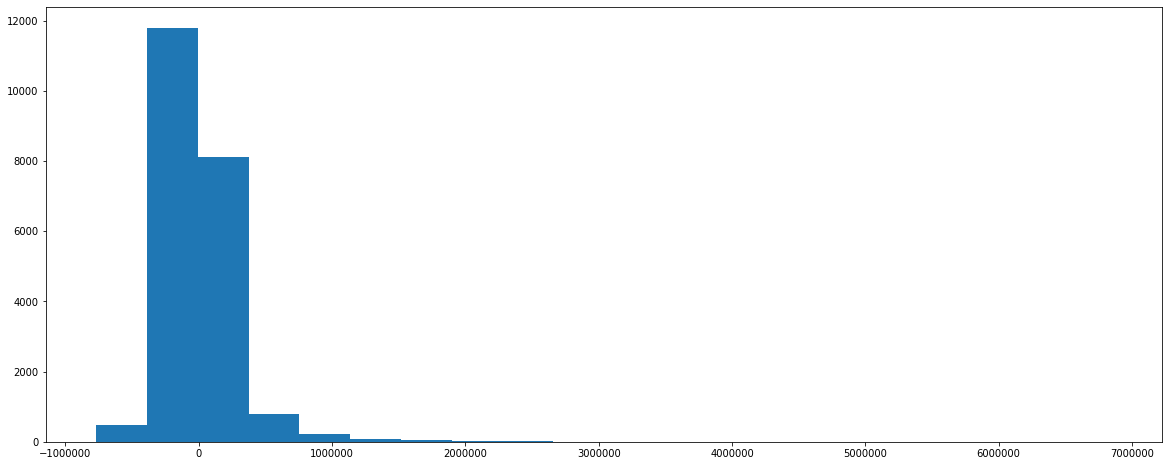

In [41]:
y_pred = model_predict([gam])
plot_residuals()

100% (11 of 11) |########################| Elapsed Time: 0:00:26 Time:  0:00:26
C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  # This is added back by InteractiveShellApp.init_path()


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     75.1277
Link Function:                     IdentityLink Log Likelihood:                               -563052.1327
Number of Samples:                        21597 AIC:                                          1126256.5208
                                                AICc:                                         1126257.0665
                                                GCV:                                      84345774590.4108
                                                Scale:                                    83817806178.3733
                                                Pseudo R-Squared:                                   0.3811
Feature Function                  Lam

C:\Users\mmsub\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


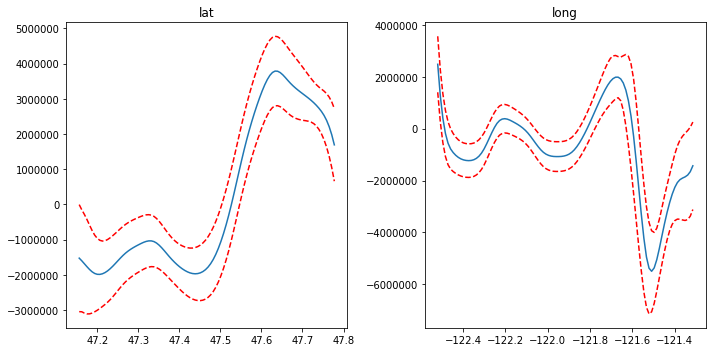

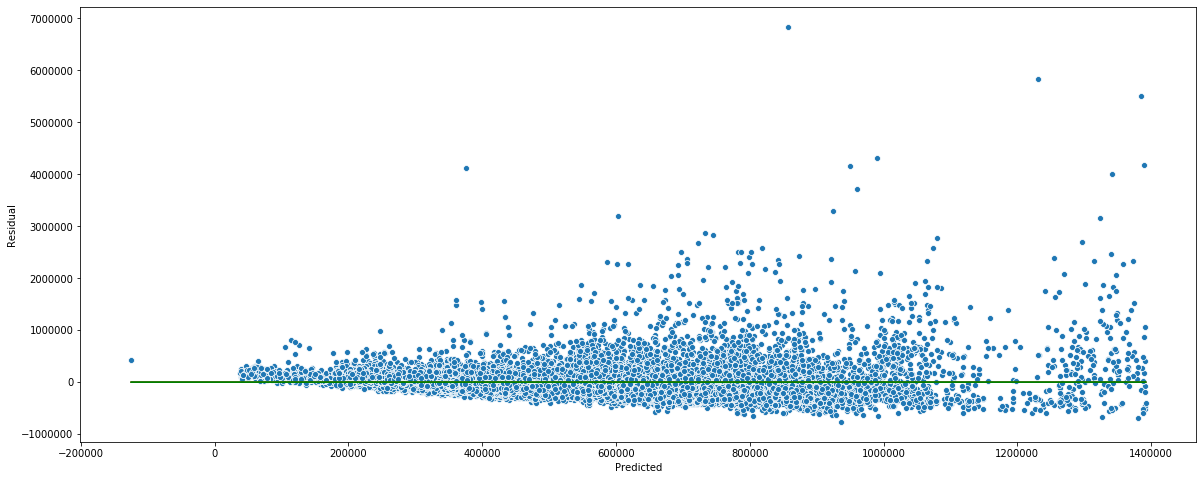

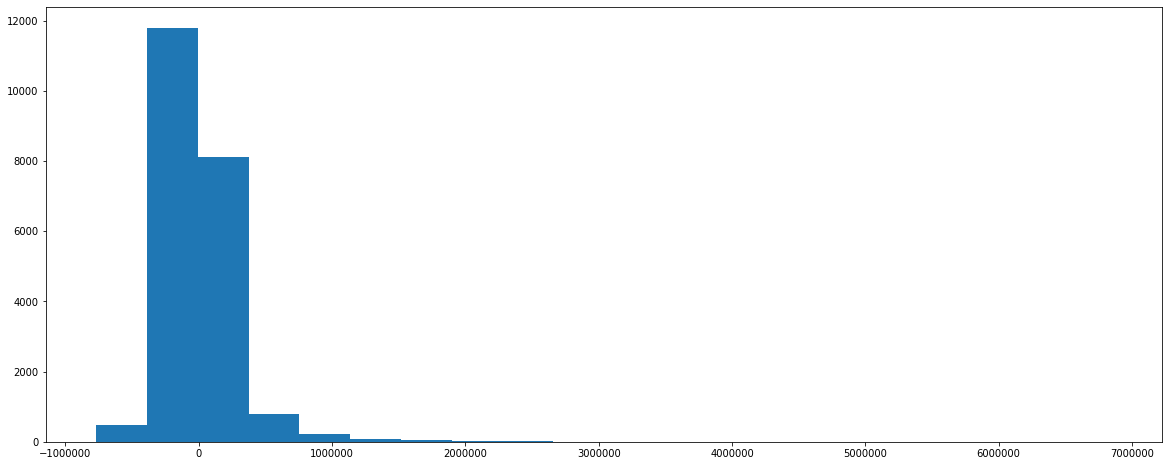

In [44]:
# Running model to plot at the same time
term_list = []
for i, col in enumerate(X):
    term_list.append(spline(i))
        
# add the interaction between lat and long
term_list.append(tensor(0, 1))

# create the terms and model
terms = np.sum(term_list)
gam = LinearGAM(terms=terms).gridsearch(X.values, y.values)
gam.summary()

## plotting
fig, axs = plt.subplots(1,2,figsize=(10,5))

titles = 'lat','long'
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
fig.tight_layout()
fig.show()

y_pred = model_predict([gam])
plot_residuals()

In [45]:
# finding real R-squared and MAE instead of pseudo R-squared
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(r2_score(y, y_pred),mean_absolute_error(y, y_pred))


0.3810721272623182 172522.84882135253


The models using only coordinates as our parameters did not return good R-squared values. The other models run in the other notebooks had much better R-squared values so this was abandoned.